In [78]:
import re
import matplotlib.pyplot as plt
import string
from nltk.tokenize.treebank import TreebankWordDetokenizer
from gensim.utils import simple_preprocess
import gensim
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.wrappers import Bidirectional

import pandas
import pickle
import bz2
import _pickle as cPickle
import zipfile
from tqdm import tqdm

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk

In [2]:
df=pd.read_csv(r'C:\Users\chriq\OneDrive\Documents\my_data\Textminingdata\minutes.csv')

In [3]:
df

,Unnamed: 0,date,contents,speaker,title
0,0,1993-02-03,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes
1,1,1993-03-23,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes
2,2,1993-05-18,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes
3,3,1993-07-07,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes
4,4,1993-08-17,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes
...,...,...,...,...,...
219,219,2021-07-28,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes
220,220,2021-09-22,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes
221,221,2021-11-03,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes
222,222,2021-12-15,"The Federal Reserve, the central bank of the U...",Jerome Powell,FOMC Meeting Minutes


In [4]:
df.speaker.value_counts()

Alan Greenspan    110
Ben Bernanke       65
Jerome Powell      32
Janet Yellen       16
other               1
Name: speaker, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  224 non-null    int64 
 1   date        224 non-null    object
 2   contents    224 non-null    object
 3   speaker     224 non-null    object
 4   title       224 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.9+ KB


In [6]:
df.rename({'index':'Unnamed: 0'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  224 non-null    int64 
 1   date        224 non-null    object
 2   contents    224 non-null    object
 3   speaker     224 non-null    object
 4   title       224 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.5+ KB


# Preprocessing

In [13]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chriq\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stemmer = SnowballStemmer('english')

In [17]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [18]:
processed_docs = df['contents'].map(preprocess)
processed_docs

0      [meet, feder, open, market, committe, hold, of...
1      [meet, feder, open, market, committe, hold, of...
2      [meet, feder, open, market, committe, hold, of...
3      [meet, feder, open, market, committe, hold, of...
4      [meet, feder, open, market, committe, hold, of...
                             ...                        
219    [feder, reserv, central, bank, unit, state, pr...
220    [feder, reserv, central, bank, unit, state, pr...
221    [feder, reserv, central, bank, unit, state, pr...
222    [feder, reserv, central, bank, unit, state, pr...
223    [feder, reserv, central, bank, unit, state, pr...
Name: contents, Length: 224, dtype: object

In [19]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abat
1 abil
2 abroad
3 abrupt
4 absenc
5 acceler
6 accept
7 accommod
8 accompani
9 accord
10 account


In [20]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [21]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[43]

[(0, 1),
 (16, 1),
 (17, 3),
 (18, 1),
 (23, 1),
 (25, 1),
 (29, 1),
 (33, 1),
 (37, 2),
 (39, 2),
 (41, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (47, 1),
 (51, 1),
 (62, 1),
 (63, 2),
 (69, 1),
 (72, 1),
 (75, 1),
 (79, 2),
 (95, 2),
 (100, 2),
 (102, 1),
 (104, 1),
 (105, 1),
 (106, 1),
 (109, 1),
 (121, 1),
 (130, 1),
 (135, 1),
 (138, 1),
 (139, 1),
 (141, 1),
 (144, 2),
 (147, 1),
 (150, 3),
 (151, 1),
 (158, 1),
 (160, 1),
 (162, 3),
 (164, 1),
 (166, 1),
 (167, 1),
 (174, 3),
 (178, 3),
 (190, 1),
 (191, 1),
 (192, 1),
 (196, 2),
 (197, 1),
 (198, 2),
 (201, 1),
 (202, 1),
 (211, 1),
 (214, 1),
 (217, 1),
 (222, 1),
 (224, 1),
 (225, 1),
 (235, 1),
 (239, 2),
 (245, 1),
 (249, 1),
 (257, 2),
 (258, 1),
 (260, 1),
 (268, 1),
 (271, 1),
 (279, 1),
 (283, 1),
 (288, 3),
 (294, 2),
 (297, 1),
 (301, 1),
 (303, 1),
 (306, 1),
 (307, 2),
 (317, 1),
 (321, 1),
 (322, 1),
 (323, 1),
 (334, 2),
 (335, 1),
 (343, 1),
 (344, 1),
 (346, 1),
 (351, 1),
 (359, 4),
 (361, 3),
 (363, 1),
 (374, 3),
 

In [22]:
bow_doc_43 = bow_corpus[43]

for i in range(len(bow_doc_43)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
                                                     dictionary[bow_doc_43[i][0]], 
                                                     bow_doc_43[i][1]))

Word 0 ("abat") appears 1 time.
Word 16 ("amend") appears 1 time.
Word 17 ("ampl") appears 3 time.
Word 18 ("analysi") appears 1 time.
Word 23 ("aris") appears 1 time.
Word 25 ("array") appears 1 time.
Word 29 ("assumpt") appears 1 time.
Word 33 ("attract") appears 1 time.
Word 37 ("banker") appears 2 time.
Word 39 ("behavior") appears 2 time.
Word 41 ("best") appears 1 time.
Word 43 ("boehn") appears 1 time.
Word 44 ("broaddus") appears 1 time.
Word 45 ("broader") appears 1 time.
Word 47 ("buoy") appears 1 time.
Word 51 ("canadian") appears 1 time.
Word 62 ("choic") appears 1 time.
Word 63 ("civilian") appears 2 time.
Word 69 ("concentr") appears 1 time.
Word 72 ("congression") appears 1 time.
Word 75 ("consecut") appears 1 time.
Word 79 ("contempl") appears 2 time.
Word 95 ("deal") appears 2 time.
Word 100 ("delay") appears 2 time.
Word 102 ("deliveri") appears 1 time.
Word 104 ("depositori") appears 1 time.
Word 105 ("design") appears 1 time.
Word 106 ("deterior") appears 1 time.
Wo

In [23]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.012977378074608494),
 (1, 0.00979559938225213),
 (2, 0.031394728720227034),
 (3, 0.009316619981098393),
 (4, 0.0250339642766676),
 (5, 0.025641495941106023),
 (6, 0.04168847169223786),
 (7, 0.059955424508320476),
 (8, 0.025456103994112453),
 (9, 0.02209046797497028),
 (10, 0.02834248125487993),
 (11, 0.01794763952110274),
 (12, 0.013296675802254354),
 (13, 0.012977378074608494),
 (14, 0.05460843874622501),
 (15, 0.0250339642766676),
 (16, 0.07777467189003318),
 (17, 0.013296675802254354),
 (18, 0.017485393565289928),
 (19, 0.03708702896332435),
 (20, 0.03685323784451296),
 (21, 0.020264971910252217),
 (22, 0.02114429684958015),
 (23, 0.042920536000493795),
 (24, 0.1688078859857297),
 (25, 0.0328613547280109),
 (26, 0.05178611724002607),
 (27, 0.01918151241411245),
 (28, 0.008855384692798675),
 (29, 0.02084423584611893),
 (30, 0.02276370918022269),
 (31, 0.016402944736663254),
 (32, 0.0422885936991603),
 (33, 0.012362342987774784),
 (34, 0.0250339642766676),
 (35, 0.0672676172896

# LDA using bag of words

In [24]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [25]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"april" + 0.007*"tech" + 0.007*"arrang" + 0.006*"deterior" + 0.005*"soften" + 0.005*"greenspan" + 0.004*"forese" + 0.004*"moskow" + 0.004*"pool" + 0.004*"strain"
Topic: 1 
Words: 0.027*"shall" + 0.017*"arrang" + 0.013*"subcommitte" + 0.011*"paragraph" + 0.011*"consult" + 0.009*"draw" + 0.007*"repurchas" + 0.007*"procedur" + 0.007*"sell" + 0.006*"million"
Topic: 2 
Words: 0.017*"april" + 0.010*"back" + 0.009*"david" + 0.008*"desk" + 0.007*"tool" + 0.007*"reinvest" + 0.005*"princip" + 0.005*"mandat" + 0.005*"guidanc" + 0.005*"soma"
Topic: 3 
Words: 0.011*"back" + 0.009*"mandat" + 0.008*"guidanc" + 0.008*"desk" + 0.007*"april" + 0.007*"tool" + 0.007*"arrang" + 0.006*"strain" + 0.005*"dual" + 0.005*"shall"
Topic: 4 
Words: 0.011*"desk" + 0.010*"pandem" + 0.008*"select" + 0.007*"repo" + 0.007*"tool" + 0.007*"back" + 0.006*"arrang" + 0.006*"princip" + 0.006*"overnight" + 0.006*"text"
Topic: 5 
Words: 0.012*"shall" + 0.012*"arrang" + 0.011*"select" + 0.011*"pandem" + 0.

# LDA using TF-IDF

In [26]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [27]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.005*"lawar" + 0.004*"legisl" + 0.004*"april" + 0.004*"lesser" + 0.004*"veloc" + 0.004*"phillip" + 0.003*"lindsey" + 0.003*"bias" + 0.003*"forrest" + 0.003*"attitud"
Topic: 1 Word: 0.009*"april" + 0.003*"strain" + 0.003*"tech" + 0.003*"deterior" + 0.003*"headlin" + 0.003*"forese" + 0.003*"soften" + 0.003*"arrang" + 0.003*"disinfl" + 0.003*"press"
Topic: 2 Word: 0.004*"pandem" + 0.003*"asia" + 0.003*"shall" + 0.003*"turmoil" + 0.002*"strike" + 0.002*"studi" + 0.002*"arrang" + 0.002*"april" + 0.002*"latin" + 0.002*"covid"
Topic: 3 Word: 0.003*"april" + 0.003*"forese" + 0.003*"shall" + 0.003*"olson" + 0.002*"geopolit" + 0.002*"santomero" + 0.002*"bie" + 0.002*"gramlich" + 0.002*"south" + 0.002*"ferguson"
Topic: 4 Word: 0.003*"regim" + 0.002*"owe" + 0.002*"april" + 0.002*"remov" + 0.002*"reinvest" + 0.002*"equal" + 0.002*"disappoint" + 0.002*"virtual" + 0.002*"refund" + 0.002*"surpris"
Topic: 5 Word: 0.007*"pandem" + 0.003*"april" + 0.003*"virus" + 0.002*"distanc" + 0.002*"

# Doc2vec

In [28]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df.contents))

In [29]:
#session crashed when i ran this, even when I had a GPU connected it didnt seem to use the GPU
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [30]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

In [31]:
train_vecs_dm

array([[-0.80111235,  0.1565466 , -0.17663424, ..., -0.28549618,
        -0.05449621,  0.26253825],
       [-0.9383391 , -1.1676013 , -0.44975588, ..., -1.4603425 ,
        -0.3754907 ,  0.43858108],
       [-0.7781848 , -0.7107702 , -0.69337916, ..., -1.149301  ,
         0.9771428 ,  0.6328382 ],
       ...,
       [-1.7138871 , -1.0565069 , -1.964551  , ...,  0.59366804,
        -0.98265755,  1.0837404 ],
       [ 0.2353587 ,  0.43755105,  0.91504425, ..., -0.16311298,
        -0.2697544 ,  0.6788294 ],
       [-0.6331355 , -1.4183699 ,  0.5514546 , ...,  0.34547153,
        -0.783713  , -0.7623654 ]], dtype=float32)

# Predictions on SPY changes


In [43]:
data=pd.read_csv("https://raw.githubusercontent.com/phzeller/TextMiningFinalProject/main/data/CompleteTable.csv?token=GHSAT0AAAAAABQ5RVENJWJE4HFO7VVPX5JIYRQPFJQ")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             240 non-null    object 
 1   contents         240 non-null    object 
 2   speaker          240 non-null    object 
 3   title            240 non-null    object 
 4   cleaned content  240 non-null    object 
 5   SPY: d-1         239 non-null    float64
 6   SPY: d+0         239 non-null    float64
 7   SPY: d+1         239 non-null    float64
 8   SPY: d+2         239 non-null    float64
 9   SPY: d+3         239 non-null    float64
 10  SPY: d+4         239 non-null    float64
 11  SPY: d+5         239 non-null    float64
 12  SPY: d+6         239 non-null    float64
 13  SPY: d+7         239 non-null    float64
 14  SPY: d+8         239 non-null    float64
 15  SPY: d+9         239 non-null    float64
 16  SPY: d+10        239 non-null    float64
 17  SPY: d+11       

In [45]:
data.head()

,date,contents,speaker,title,cleaned content,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+7,SPY: d+8,SPY: d+9,SPY: d+10,SPY: d+11,SPY: d+12,SPY: d+13,SPY: d+14,^TNX: d-1,^TNX: d+0
0,1993-02-03,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",25.864319,26.137705,26.247076,26.228842,26.228842,...,26.010128,25.353931,25.335707,25.317488,25.408623,25.499762,25.481527,25.809631,6.46,6.45
1,1993-03-23,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.242840,26.297781,26.297781,26.462601,26.316103,...,26.389343,25.839956,25.968130,25.894896,25.986469,25.949833,26.316103,26.371027,5.96,5.91
2,1993-05-18,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",25.876574,25.858263,26.389343,26.462601,26.224524,...,26.627411,26.499220,26.755627,26.718983,26.627411,26.535849,26.444286,26.206215,6.07,6.15
3,1993-07-07,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.096848,26.170630,26.465719,26.539494,26.521049,...,26.410383,26.391937,26.465719,26.447269,26.262844,26.391937,26.539494,26.521049,5.80,5.80
4,1993-08-17,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",26.779249,26.871473,27.019001,27.019001,27.037451,...,27.314091,27.295652,27.406319,27.480087,27.443205,27.350975,27.369415,27.184986,5.68,5.70


In [49]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(data.contents))

In [50]:
#session crashed when i ran this, even when I had a GPU connected it didnt seem to use the GPU
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [51]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

In [55]:
data.sample(10)

,date,contents,speaker,title,cleaned content,SPY: d-1,SPY: d+0,SPY: d+1,SPY: d+2,SPY: d+3,...,SPY: d+7,SPY: d+8,SPY: d+9,SPY: d+10,SPY: d+11,SPY: d+12,SPY: d+13,SPY: d+14,^TNX: d-1,^TNX: d+0
193,2016-04-27,"The Federal Reserve, the central bank of the U...",Janet Yellen,FOMC Meeting Minutes,"['Federal', 'Reserve', 'central', 'bank', 'Uni...",188.156586,188.543884,186.832672,185.823990,187.301025,...,185.274658,185.427719,187.733337,185.977127,186.031128,184.410034,186.229309,184.491089,1.931,1.860
35,1997-05-20,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",53.668827,54.311848,54.191246,54.010452,54.512783,...,54.753891,54.512783,54.331902,54.271648,54.472569,55.537502,55.818802,55.989586,6.694,6.690
97,2004-06-30,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",80.735870,81.168144,80.041321,79.998772,79.297195,...,79.219215,79.275909,79.034943,78.524696,78.460876,78.127800,79.119980,77.660057,4.695,4.617
65,2000-12-19,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",89.314407,87.495308,84.961205,85.550041,88.115685,...,88.283958,86.685669,90.849617,89.871742,86.938034,87.611000,87.379654,88.914833,5.156,5.184
143,2010-01-27,"January 26-27, 2010\n\n[SECTION]\n\nPRESENT:\n...",Ben Bernanke,FOMC Meeting Minutes,"['January', '26-27', '2010', 'SECTION', 'PRESE...",86.700676,87.113167,86.113770,85.177834,86.502411,...,84.598824,83.988083,85.043007,84.876411,85.764755,85.693390,87.041771,87.454208,3.630,3.644
93,2003-12-09,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",75.336952,74.755676,74.748695,75.589088,75.736153,...,76.842720,76.628784,77.163612,77.212875,77.135445,77.191757,78.219078,78.233139,4.278,4.352
99,2004-09-21,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",80.040016,80.388725,79.385262,78.958275,79.321259,...,79.534744,80.879768,81.014977,81.057655,81.612808,80.737427,80.068466,80.395866,4.058,4.037
38,1997-09-30,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",61.788975,61.141106,61.950909,62.295090,62.608902,...,62.942963,62.760719,62.821434,62.841732,62.700005,61.707973,61.080357,61.950909,6.081,6.107
141,2009-11-04,"November 3-4, 2009\n\n[SECTION]\n\nPRESENT:Mr....",Ben Bernanke,FOMC Meeting Minutes,"['November', '3-4', '2009', 'SECTION', 'PRESEN...",82.560066,82.773079,84.295692,84.516586,86.441551,...,86.480988,87.735367,87.837952,87.782700,86.638763,86.331100,87.427689,87.561813,3.473,3.546
89,2003-06-25,A meeting of the Federal Open Market Committee...,Alan Greenspan,FOMC Meeting Minutes,"['meeting', 'Federal', 'Open', 'Market', 'Comm...",68.734894,68.044212,68.930260,68.134926,68.113983,...,70.255821,70.569771,70.172134,69.279099,69.934914,70.276756,70.123276,69.711639,3.265,3.361


In [65]:
def pct_change_from_day_0(announcement):
    pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
    if pct_change>0:
        return 'up'
    else:
        return 'down'

In [66]:
pct_change_from_day_0(data.iloc[141])

'up'

In [67]:
data['+7change']=data.apply(pct_change_from_day_0,axis=1)

In [68]:
data.iloc[141]

date                                                      2009-11-04
contents           November 3-4, 2009\n\n[SECTION]\n\nPRESENT:Mr....
speaker                                                 Ben Bernanke
title                                           FOMC Meeting Minutes
cleaned content    ['November', '3-4', '2009', 'SECTION', 'PRESEN...
SPY: d-1                                                   82.560066
SPY: d+0                                                   82.773079
SPY: d+1                                                   84.295692
SPY: d+2                                                   84.516586
SPY: d+3                                                   86.441551
SPY: d+4                                                   86.457344
SPY: d+5                                                   86.899109
SPY: d+6                                                   86.015572
SPY: d+7                                                   86.480988
SPY: d+8                          

In [70]:
data['+7change'].value_counts()

up      146
down     94
Name: +7change, dtype: int64

In [74]:
labels=data['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [76]:
labels_onehot[:10]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

216 24 216 24


In [110]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

194 22 194 22


In [111]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30
2/2 [==============================] - 4s 806ms/step - loss: 0.2971 - accuracy: 0.5155 - val_loss: 0.2478 - val_accuracy: 0.6364
Epoch 2/30
2/2 [==============================] - 0s 254ms/step - loss: 0.2748 - accuracy: 0.5670 - val_loss: 0.2463 - val_accuracy: 0.6364
Epoch 3/30
2/2 [==============================] - 1s 289ms/step - loss: 0.2753 - accuracy: 0.5567 - val_loss: 0.2450 - val_accuracy: 0.6364
Epoch 4/30
2/2 [==============================] - 1s 319ms/step - loss: 0.2830 - accuracy: 0.5000 - val_loss: 0.2438 - val_accuracy: 0.6364
Epoch 5/30
2/2 [==============================] - 1s 312ms/step - loss: 0.2505 - accuracy: 0.5773 - val_loss: 0.2427 - val_accuracy: 0.6364
Epoch 6/30
2/2 [==============================] - 1s 316ms/step - loss: 0.2662 - accuracy: 0.6237 - val_loss: 0.2417 - val_accuracy: 0.6364
Epoch 7/30
2/2 [==============================] - 1s 310ms/step - loss: 0.2630 - accuracy: 0.5670 - val_loss: 0.2407 - val_accuracy: 0.6364
Epoch 8/30
2/2 [====

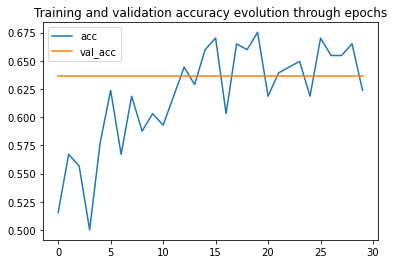

<Figure size 432x288 with 0 Axes>

In [112]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

In [113]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 0s 31ms/step - loss: 0.2393 - accuracy: 0.6111


[0.23927396535873413, 0.6111111044883728]

In [114]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 46ms/step - loss: 0.2476 - accuracy: 0.5833


[0.24757099151611328, 0.5833333134651184]